Задание 8. Реализация проекционного метода для ОДУ 2-го порядка

In [2]:
! pip install numpy
! pip install matplotlib
! pip install scipy

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.special import jacobi
from scipy.misc import derivative

Релизация метода Ритца

In [4]:
def solve(coefs, alphas, betas, base_f, base_df, n):
    assert not np.isclose(abs(alphas[0]) + abs(alphas[1]), 0), "Некорректные граничные условия"
    assert not np.isclose(abs(betas[0]) + abs(betas[1]), 0), "Некорректные граничные условия"
    assert alphas[0] * alphas[1] >= 0, "Некорректные граничные условия"
    assert betas[0] * betas[1] >= 0, "Некорректные граничные условия"
    p = coefs[0]
    r = coefs[1]
    f = coefs[2]
    right = np.array([ 0. ] * n)
    for i in range(n):
        right[i] = integrate.quad(lambda x: f(x) * base_f(i, x), -1, 1)[0]
    right = np.array(right)
    left = []
    for i in range(n):
        left.append([ 0. ] * n)
        for j in range(n):
            f = lambda x: -p(x) * base_df(i, x) * base_df(j, x) + r(x) * base_f(i, x) * base_f(j, x)
            left[i][j] = integrate.quad(f, -1, 1)[0]
    return np.linalg.solve(left, right)

Тестирование метода Ритца

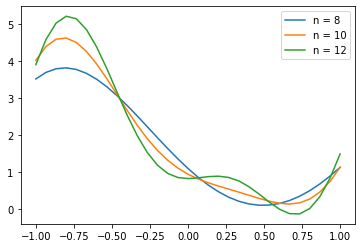

In [7]:
def base_f2(i, x):
    if i == 0:
        return 1
    if i == 1:
        return x
    return (1 - x * x) * jacobi(i - 2, 1., 1.)(x)

def base_df2(i, x):
    if i == 0:
        return 0
    if i == 1:
        return 1
    return derivative(lambda x0: (1 - x0 * x0) * jacobi(i - 2, 1., 1.)(x0), x)

base_f = lambda i, x: (1 - x * x) * jacobi(i, 1., 1.)(x)

base_df = lambda i, x: derivative(lambda x: (1 - x * x) * jacobi(i, 1., 1.)(x), x)
p = lambda x: -(2 + x) / (3 + x)
r = lambda x: 1 + math.sin(x)
f = lambda x: 1 - x
K = 30
h = 2 / 30
#n = 2
xaxis = np.array([-1 + i * h for i in range(K + 1)])
#coefs = solve((p, r, f), (1, 0), (1, 0), base_f, base_df, n)
#solution = np.array([sum(coefs[i] * base_f(i, x) for i in range(n)) for x in xaxis])
#plt.plot(xaxis, solution)
#n = 4
#coefs = solve((p, r, f), (1, 0), (1, 0), base_f, base_df, n)
#solution = np.array([sum(coefs[i] * base_f(i, x) for i in range(n)) for x in xaxis])
#plt.plot(xaxis, solution)
n = 8
coefs = solve((p, r, f), (0, 1), (1, 1), base_f2, base_df2, n)
solution = np.array([sum(coefs[i] * base_f2(i, x) for i in range(n)) for x in xaxis])
plt.plot(xaxis, solution)
n = 10
coefs = solve((p, r, f), (0, 1), (1, 1), base_f2, base_df2, n)
solution = np.array([sum(coefs[i] * base_f2(i, x) for i in range(n)) for x in xaxis])
plt.plot(xaxis, solution)
n = 12
coefs = solve((p, r, f), (0, 1), (1, 1), base_f2, base_df2, n)
solution = np.array([sum(coefs[i] * base_f2(i, x) for i in range(n)) for x in xaxis])
plt.plot(xaxis, solution)
plt.legend(['n = 8', 'n = 10', 'n = 12'])
plt.show()

Тестирование на собственном примере

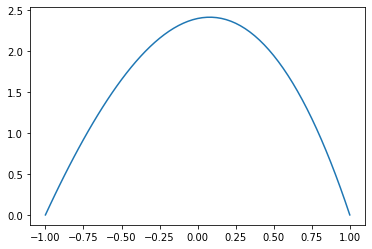

In [6]:
p = lambda x: -x * x
r = lambda x: 1
f = lambda x: -x * x + 4 * x + 5
K = 64
h = 2 / K
n = 2
xaxis = np.array([-1 + i * h for i in range(K + 1)])
coefs = solve((p, r, f), (1, 2), (1, 2), base_f, base_df, n)
solution = np.array([sum(coefs[i] * base_f(i, x) for i in range(n)) for x in xaxis])
plt.plot(xaxis, solution)
plt.show()